## Introduction
YouTube is the most popular and most used video platfrom in the world today. YouTube has [a list of **trending videos**](https://www.youtube.com/feed/trending) that is updated constantly. I will used **Python** with some packages like **Pandas**, **NLTK**,and **Matplotlib** to analyze a dataset includes several countries. I will analyze this data to get insights into YouTube trending videos, to see what is common between these videos. These insights might also be used by people who want to increase popularity of their videos on YouTube.

The dataset that we will use is downloaded from Kaggle [here](https://www.kaggle.com/datasnaek/youtube-new).

## Goals of the analysis
We want to answer questions like:

## Table of contents
* [Importing libraries](#lib)
* [Read in the dataset](#read)
* [Data cleaning](#clean)
* [Dataset collection distribution](#coll)
* [Analysis](#ana)
* [Tags Sentimental Analysis](#nltk)

## <a name="lib"></a>Importing libraries

In [2]:
import pandas as pd
pd.set_option('display.max_columns', None) #Dataframe display setting
# import pandas_profiling
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns
import plotnine as p9

import warnings
warnings.filterwarnings('ignore')
import json
import os

%matplotlib inline

## <a name="read"></a>Read in the dataset

In [3]:
files_path = os.getcwd() + '\\youtube'
files = os.listdir(files_path)
csvs = [csv for csv in files if csv.endswith('csv')]
jsons = [json for json in files if json.endswith('json')]

In [4]:
dfs = []
for csv in csvs:
    df = pd.read_csv(files_path + '\\' + csv)
    df['nation'] = csv[0:2]
    dfs.append(df)
data = pd.concat(dfs) #concatenate all csv files

In [5]:
cat_dict = {}
with open(files_path + '\\US_category_id.json', 'r') as f:
    j = json.load(f)
    for item in j['items']:
        cat_dict[np.int(item['id'])] = item['snippet']['title']

data['category'] = data.category_id.map(cat_dict).rename(columns={'category_id':'category'})
data.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,nation,category
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...,CA,Music
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,CA,Comedy
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,CA,Comedy
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,CA,Entertainment
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...,CA,Music


## <a name="clean"></a> Data cleaning
### Goals:
- Convert features into right data types
- Deal with NA value
- Create possibly useful new features

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 184755 entries, 0 to 40948
Data columns (total 18 columns):
video_id                  184755 non-null object
trending_date             184755 non-null object
title                     184755 non-null object
channel_title             184755 non-null object
category_id               184755 non-null int64
publish_time              184755 non-null object
tags                      184755 non-null object
views                     184755 non-null int64
likes                     184755 non-null int64
dislikes                  184755 non-null int64
comment_count             184755 non-null int64
thumbnail_link            184755 non-null object
comments_disabled         184755 non-null bool
ratings_disabled          184755 non-null bool
video_error_or_removed    184755 non-null bool
description               178356 non-null object
nation                    184755 non-null object
category                  184755 non-null object
dtypes: bool(3), in

In [7]:
data['trending_date'] = pd.to_datetime(data.trending_date, format='%y.%d.%m')
data['publish_time'] = pd.to_datetime(data.publish_time, format='%Y-%m-%dT%H:%M:%S.%fZ')

data.insert(7, 'publish_date', data.publish_time.dt.date)
data['publish_date'] = pd.to_datetime(data.publish_date)
data.insert(7, 'publish_day', data.publish_time.dt.dayofweek)
data.insert(7, 'publish_hour', data.publish_time.dt.hour)

data.description = data.fillna('')

In [8]:
data.head(3)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,publish_hour,publish_day,publish_date,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,nation,category
0,n1WpP7iowLc,2017-11-14,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10 17:00:03,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17,4,2017-11-10,17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,n1WpP7iowLc,CA,Music
1,0dBIkQ4Mz1M,2017-11-14,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13 17:00:00,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",17,0,2017-11-13,1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,0dBIkQ4Mz1M,CA,Comedy
2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12 19:05:24,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",19,6,2017-11-12,3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,5qpjK5DgCt4,CA,Comedy


## <a name='coll'></a> Dataset collection distribution

,%_of_videos
2018,0.740316
2017,0.259684


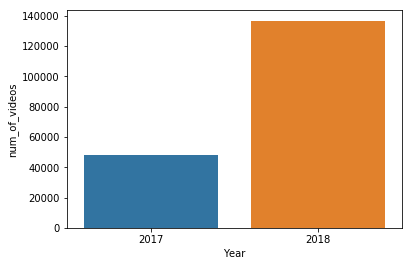

In [9]:
ydata = data.trending_date.dt.year.value_counts().to_frame().reset_index() \
            .rename(columns={'index': 'year', 'trending_date': 'num_of_videos'})

fig, ax = plt.subplots()
x = ydata.year
y = ydata.num_of_videos
fig = sns.barplot(x=x, y=y, data=ydata)
fig = ax.set(xlabel="Year", ylabel="num_of_videos")

data.trending_date.dt.year.value_counts(normalize = True).to_frame().rename(columns = {'trending_date': '%_of_videos'})

,%_of_videos
Entertainment,0.279164
Music,0.155168
People & Blogs,0.110032
Comedy,0.077887
Sports,0.069216
News & Politics,0.068897
Howto & Style,0.061021
Film & Animation,0.057709
Gaming,0.035068
Science & Technology,0.027972


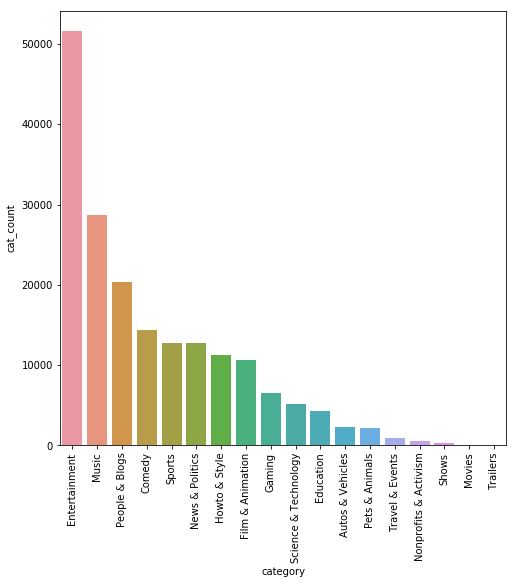

In [10]:
cat_data = data.groupby('category').size().sort_values(ascending = False).reset_index(name = 'cat_count')
x = cat_data.category
y = cat_data.cat_count
fig, ax = plt.subplots(figsize = (8,8))
sns.barplot(x,y,data = cat_data)
plt.xticks(rotation='vertical')
data.category.value_counts(normalize = True).to_frame().rename(columns={'category':'%_of_videos'})

nation
CA    23326
DE    40840
FR    40724
GB    38916
US    40949
Name: title, dtype: int64

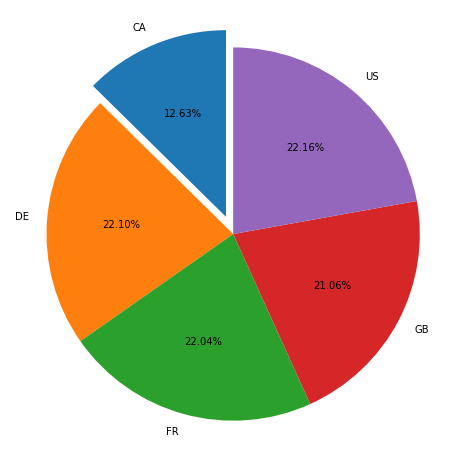

In [11]:
labels = data.groupby(['nation']).count().index
sizes = data.groupby(['nation']).count()['title']
explode = (0.1, 0, 0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig, ax = plt.subplots(figsize = (8,8))
ax.pie(sizes, labels=labels, autopct='%1.2f%%',
        shadow=False, explode=explode, startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
sizes

In [12]:
data.shape

(184755, 21)

- Out of 184755 videos, __74%__ of them is collected from 2018 and __26%__ of them is collected from 2017;
- __27.9%__ of the dataset is related Entertainment, __15.5%__ of the dataset is related to Music, and __11%__ of the dataset is realted to People & Blogs
- Also, only __12.63%__ of the videos is from Canada

## <a name = 'ana'></a> Analysis

### How long usually a video can trend in different countries?
From here we can see that United Kingdom's list has the longest trended Youtube videos (Top 5 in the list is from GB). Also, the US and UK have longer trending days while other countries' videos can only be trended for less than 10 days

In [13]:
fre = data.groupby(['video_id','nation']).size().reset_index(name = 'trending_days').sort_values('trending_days', ascending = False)
fre.head(5), fre.tail(5)

(          video_id nation  trending_days
 76579  u_C4onVrr8U     GB             38
 5219   2z3EUY1aXdY     GB             38
 32284  NooW_RbfdWI     GB             38
 25651  Il-an3K9pjg     GB             38
 16552  BhIEIO0vaBE     GB             38,
           video_id nation  trending_days
 34055  PBjjzcbLCLo     DE              1
 34056  PBsbuFyXSJE     FR              1
 34059  PC1rmoEwIwQ     CA              1
 34060  PC6M5bhy2jE     DE              1
 83479  zzz0_5fMnI8     FR              1)

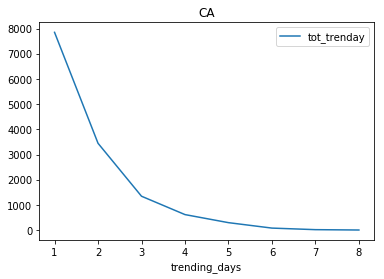

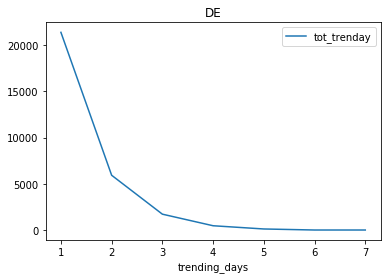

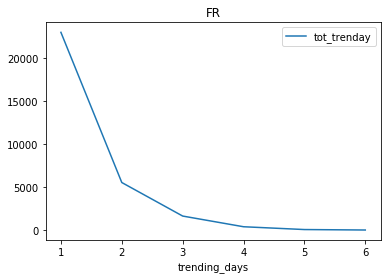

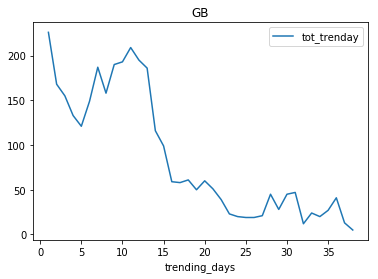

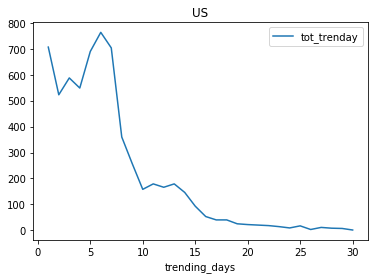

In [14]:
nfre = fre.groupby(['nation','trending_days']).size().reset_index(name = 'tot_trenday')
nation_ls = nfre.nation.unique().tolist()
for n in nation_ls:
    nfre[nfre['nation'] == n][['trending_days', 'tot_trenday']].set_index('trending_days').plot(title = n)

### How many views, likes, dislikes, and comments on average in different countries

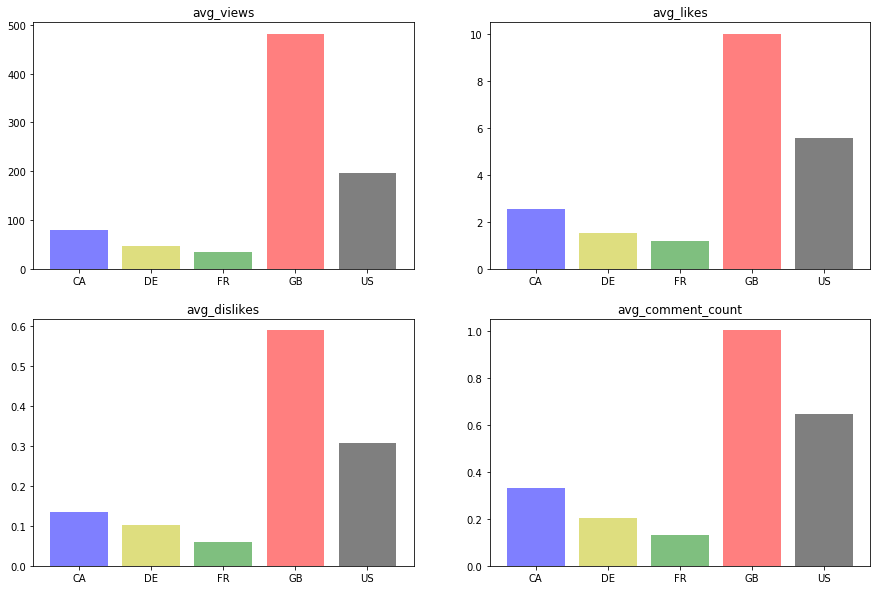

In [15]:
my_df = data.reset_index().sort_values('trending_date').drop_duplicates(['video_id','nation'],keep='last')#only keep the lastest update

stats = my_df.groupby('nation')[['views','likes','dislikes','comment_count']].mean().reset_index()
stat_ls = np.array([['views','likes'],['dislikes','comment_count']])

fig, [[ax1, ax2], [ax3, ax4]] = plt.subplots(ncols=2,nrows=2, figsize=(15,10))

for i, axs in enumerate([[ax1, ax2], [ax3, ax4]]):
    for j, ax in enumerate(axs):
        ax.bar(x = stats.nation.tolist(), height = stats[stat_ls[i,j]]/10000,
              color=['b','y','g','r','k'], alpha = 0.5)
        ax.set_title('avg_' + stat_ls[i,j])

### Variable Correlation
- Above plots indicate that videos with longer trending days have more views, likes, dislikes, and comments;
- However, Adj. R-squared (0.116) and t-scores of each variables show that views, likes, dislikes, and comments are not statistically significant in predicting trending days
- Likes is highly correlated with views and comments while dislikes is highly correlated with comments

In [16]:
import statsmodels.api as sm

In [17]:
full_stat = pd.merge(my_df, fre).sort_values('trending_days',ascending = False)
X = full_stat[['views','likes','dislikes','comment_count']]
y= full_stat.trending_days 
X = sm.add_constant(X) #add an intercept for the model 
result = sm.OLS(y,X).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:          trending_days   R-squared:                       0.116
Model:                            OLS   Adj. R-squared:                  0.116
Method:                 Least Squares   F-statistic:                     2742.
Date:                Sat, 20 Jul 2019   Prob (F-statistic):               0.00
Time:                        07:54:38   Log-Likelihood:            -2.1244e+05
No. Observations:               83480   AIC:                         4.249e+05
Df Residuals:                   83475   BIC:                         4.249e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             2.0151      0.011    185.135

In [18]:
full_stat[['views','likes','dislikes','comment_count']].corr()

,views,likes,dislikes,comment_count
views,1.000000,0.760831,0.416610,0.497356
likes,0.760831,1.000000,0.443768,0.780488
dislikes,0.416610,0.443768,1.000000,0.702464
comment_count,0.497356,0.780488,0.702464,1.000000


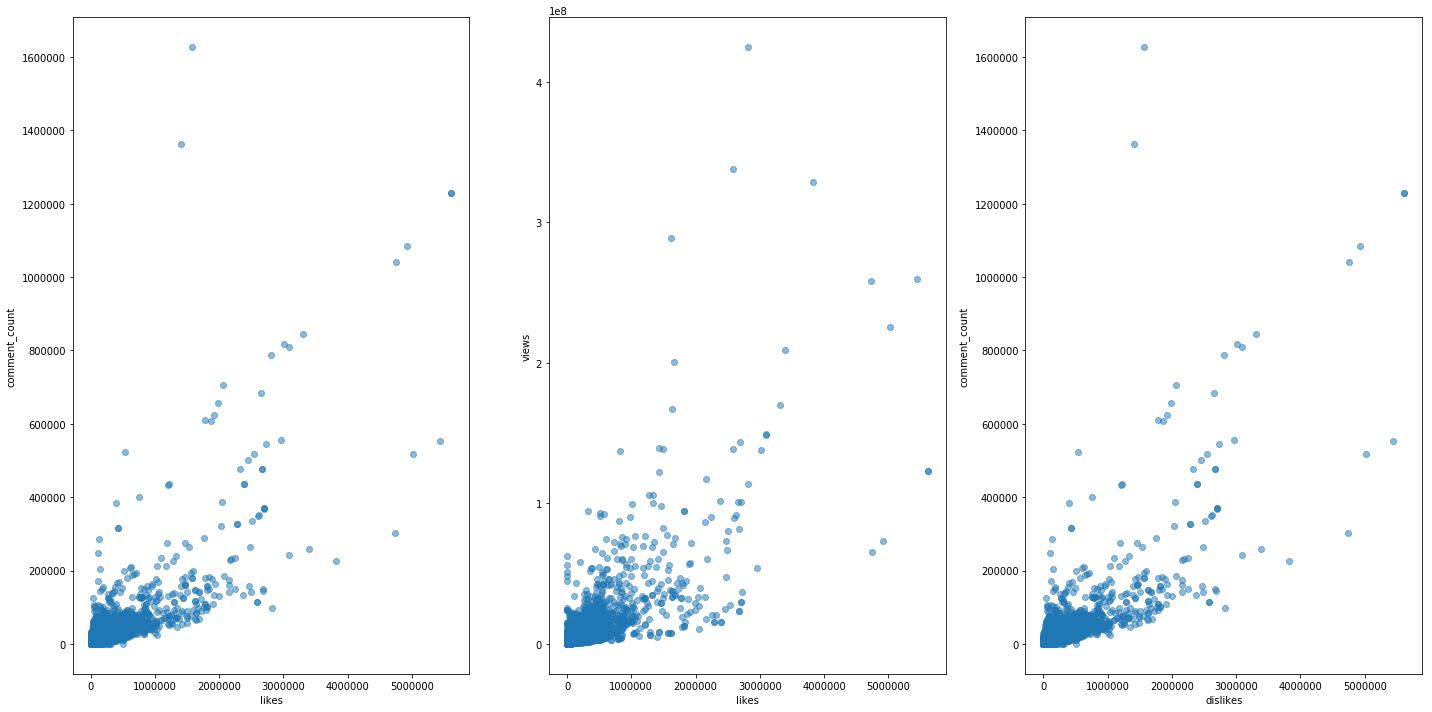

In [19]:
fig,[ax1, ax2, ax3]= plt.subplots(1,3, figsize = (20,10))

ax1.scatter(x = full_stat.likes, y = full_stat.comment_count, alpha = 0.5)
ax1.set(xlabel = 'likes', ylabel = 'comment_count')
ax2.scatter(x = full_stat.likes, y = full_stat.views, alpha = 0.5)
ax2.set(xlabel = 'likes', ylabel = 'views')
ax3.scatter(x = full_stat.likes, y = full_stat.comment_count, alpha = 0.5)
ax3.set(xlabel = 'dislikes', ylabel = 'comment_count')

plt.tight_layout()

### Category Analysis
#### Which category has the most trending videos in different countries? What is the average trending days for each category in dfferent countries?
- Entertainment has the most trended video in all the countries
- Obviously, videos in UK and US have much longer average trending days than other coutries; videos in all categories in the UK have long trending days

In [20]:
# compute how many days it takes to become trended after publish
temp = data.sort_values('trending_date',ascending = False).drop_duplicates(['video_id','nation'],keep='last')
temp['publish_to_trend'] = temp.trending_date - temp.publish_date
temp['publish_to_trend'] = temp.publish_to_trend.astype('timedelta64[D]').astype(int)
temp = temp[['video_id','nation','publish_to_trend']]
cat_df = pd.merge(full_stat, temp)

In [21]:
def cat_plot(nation, df):
    cat_df_gb = df[df.nation == nation]['category'].value_counts().reset_index()
    plt.figure(figsize=(15,8))
    ax = sns.barplot(y=cat_df_gb['index'],x=cat_df_gb['category'], data=cat_df_gb,orient='h')
    plt.xlabel("Number of Videos") 
    plt.ylabel("Categories")
    plt.title('Catogories of trend videos in ' + nation)
    plt.tight_layout()

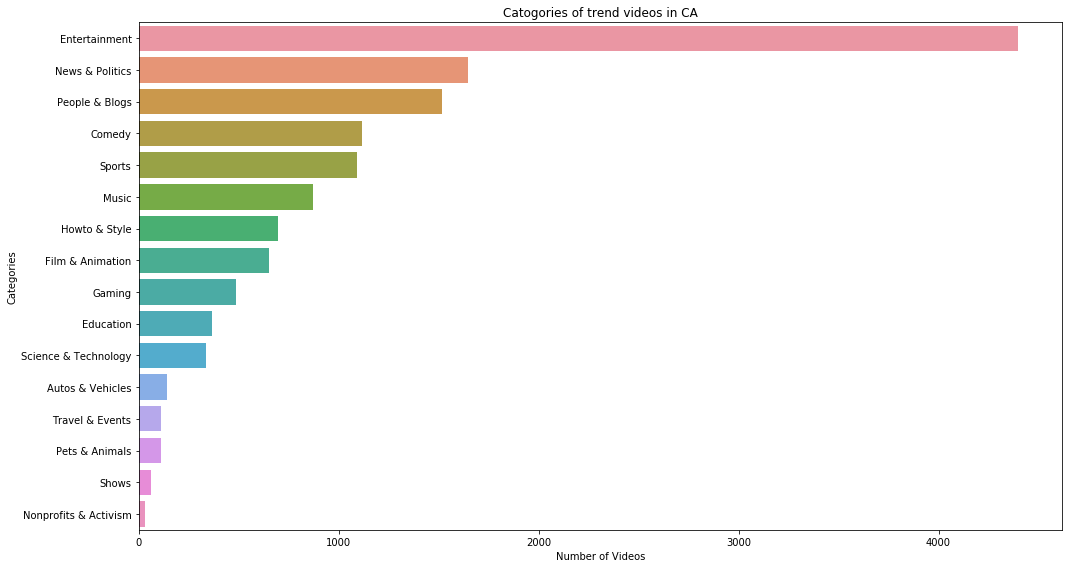

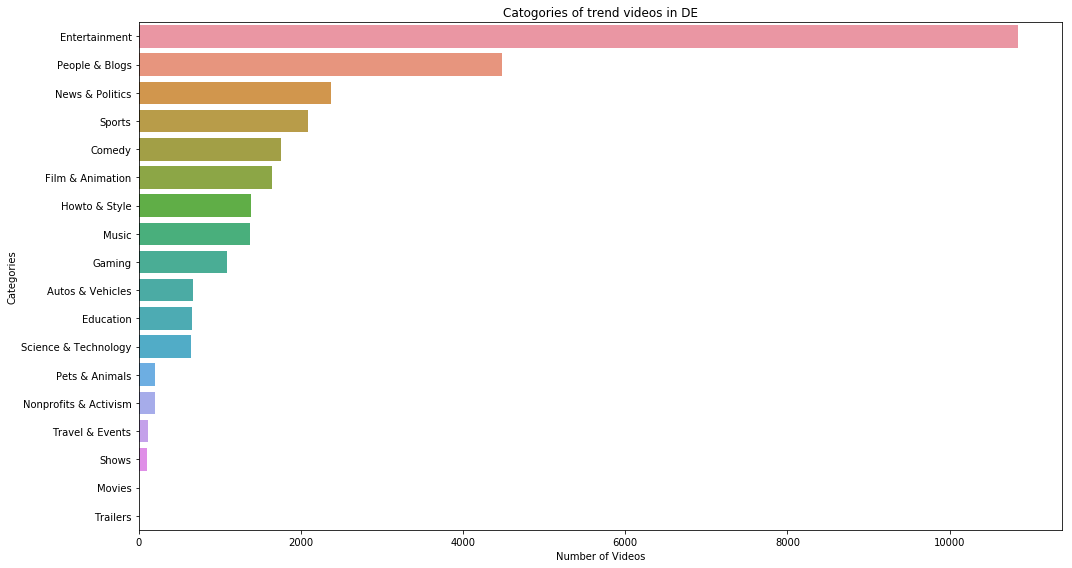

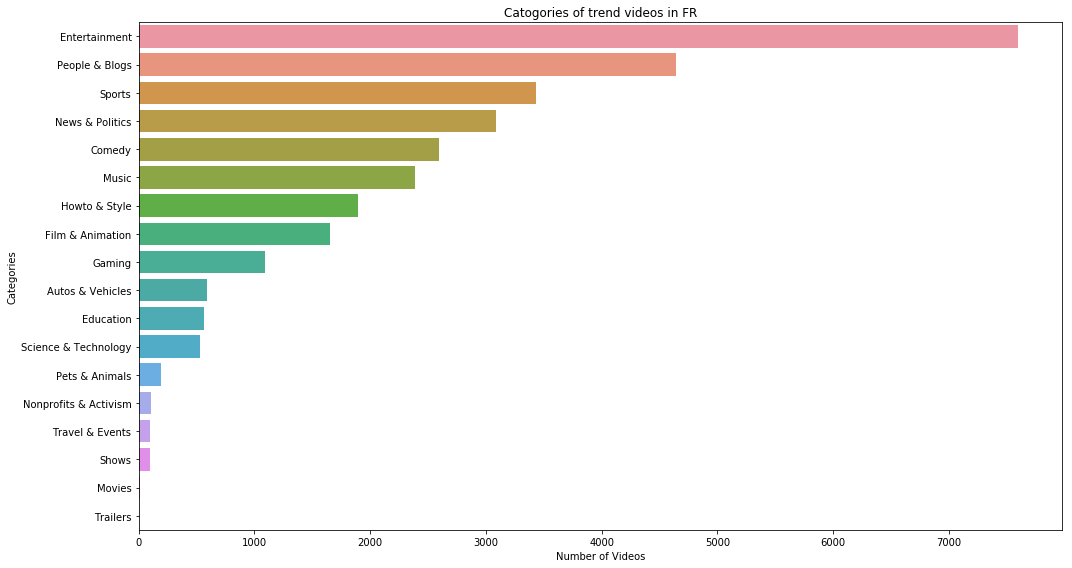

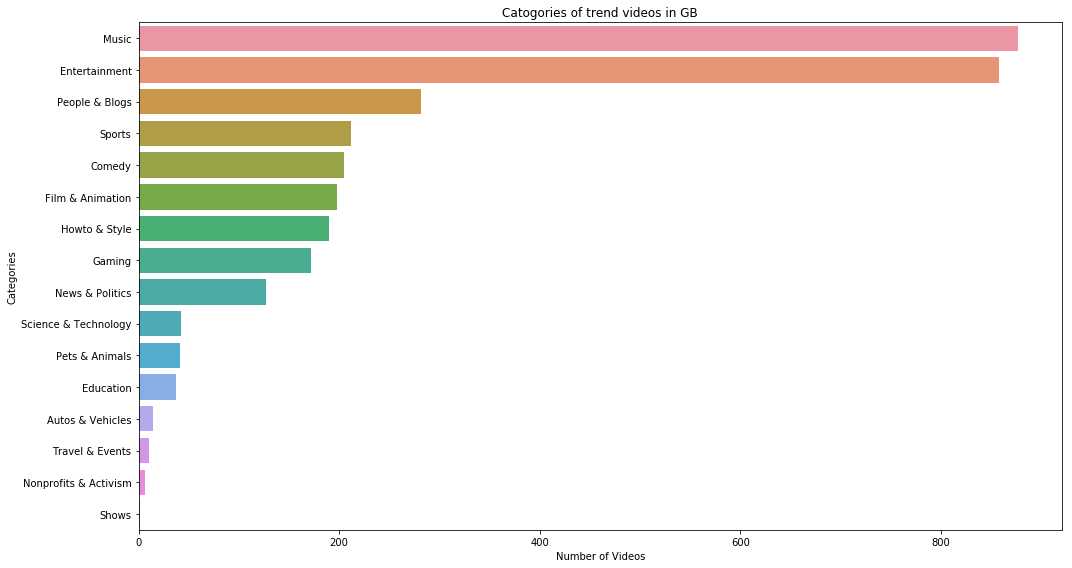

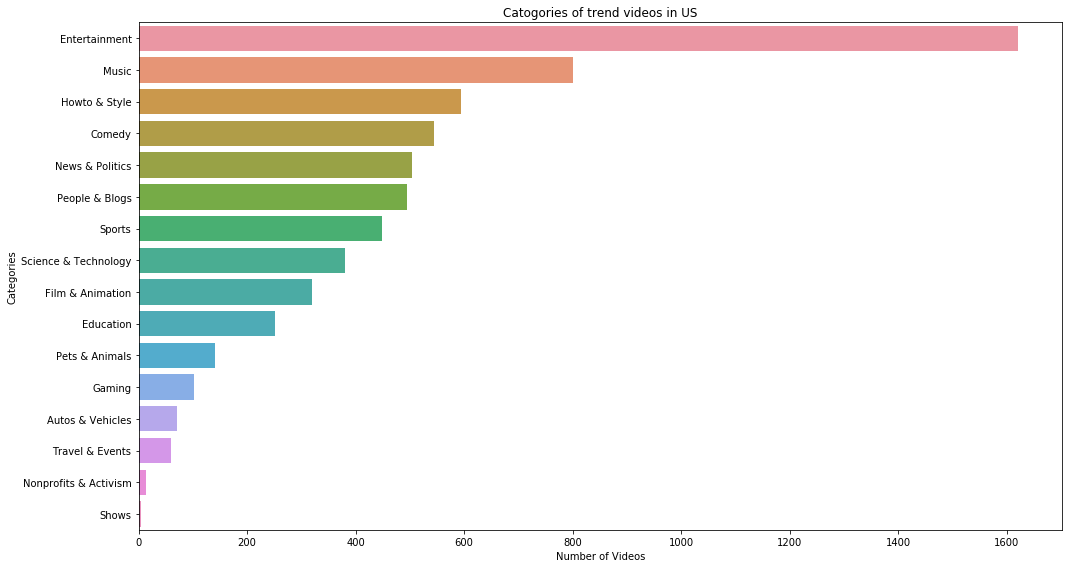

In [22]:
for n in nation_ls:
    cat_plot(nation = n, df = cat_df)

trending_days                                          
nation                           CA        DE        FR         GB         US
category                                                                     
Autos & Vehicles           1.450000  1.296131  1.138748  10.285714   5.422535
Comedy                     1.995524  1.443746  1.672055   8.951220   6.343750
Education                  1.669399  1.274924  1.362832  12.351351   6.613546
Entertainment              1.676444  1.409996  1.292616  10.624709   6.149291
Film & Animation           1.847095  1.446744  1.301750  13.030303   7.340625
Gaming                     1.750515  1.436180  1.334249  10.343023   7.932039
Howto & Style              1.565093  1.263577  1.247886  10.205263   6.973064
Movies                     0.000000  2.000000  1.100000   0.000000   0.000000
Music                      2.440873  1.726744  1.650084  15.702395   8.082397
News & Politics            1.412621  1.238497  1.216926   9.645669   4.932540
Nonprofits & Activism      1.625000  1.267327  1.096154  15.000000   4.071429
People & Blogs             1.637442  1.337877  1.231631  10.301418   6.470707
Pets & Animals             1.920354  1.240196  1.215385  13.024390   6.635714
Science & Technology       1.896450  1.245750  1.502814  12.333333   6.312336
Shows                      1.190476  1.077670  1.041667  21.000000  14.250000
Sports                     1.474406  1.316595  1.263679   8.990566   4.824053
Trailers                   0.000000  1.000000  2.000000   0.000000   0.000000
Travel & Events            1.956140  1.224138  1.226804   9.600000   6.779661

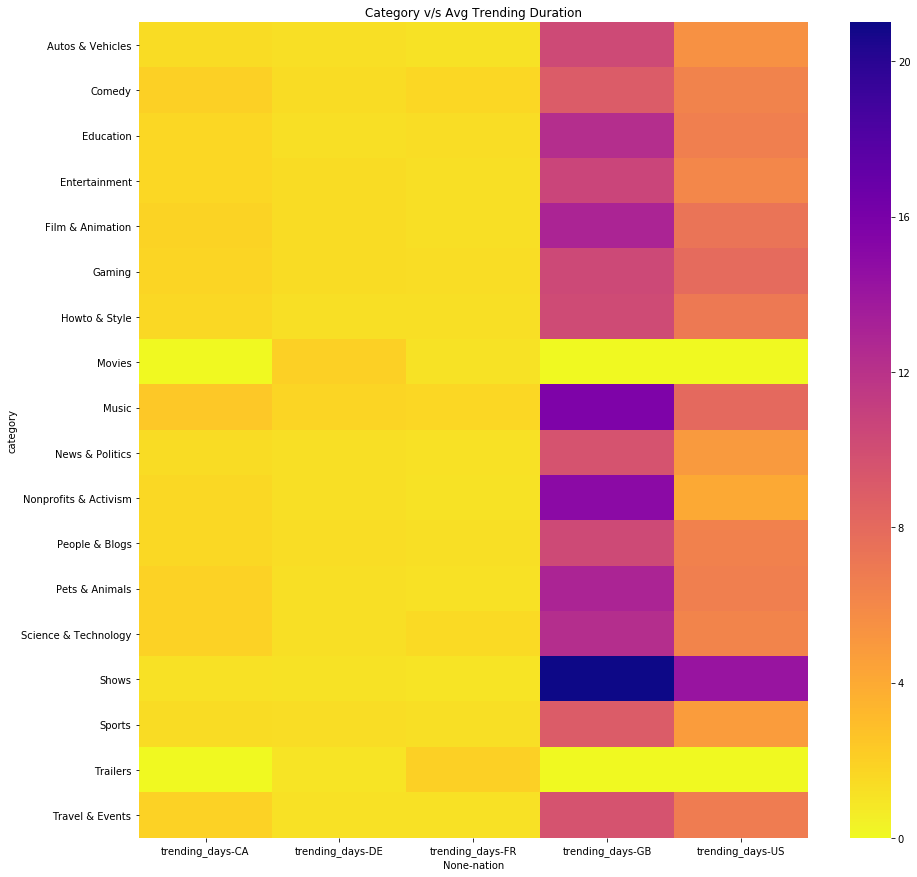

In [23]:
cat_trend_days= cat_df.groupby(['category','nation']).mean()[['trending_days']].unstack().fillna(0)
plt.figure(figsize=(15,15))#You can Arrange The Size As Per Requirement
sns.heatmap(cat_trend_days, cmap='plasma_r')
plt.title("Category v/s Avg Trending Duration")
cat_trend_days

### Hour and Day Analysis
#### What time are videos published the most? What day are videos published the most?
- Climbing up in after 12 p.m and peak at 4 p.m and 5 p.m
- A little bit more videos on Thurseday and less on Weekend

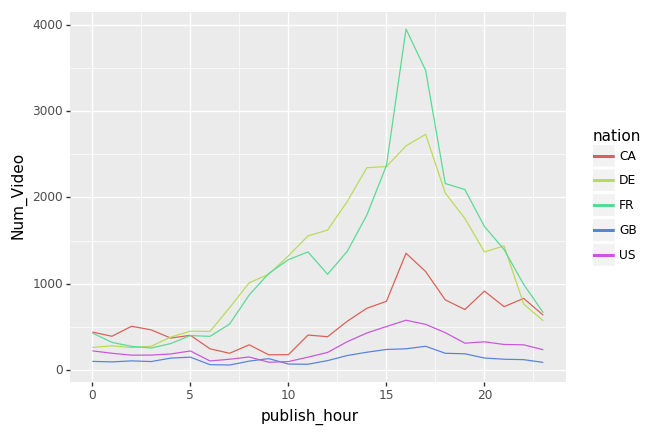

<ggplot: (30460094)>

In [24]:
hdf = cat_df.groupby('nation').publish_hour.value_counts().to_frame().rename(columns = {'publish_hour':'Num_Video'}).reset_index()
p9.ggplot(hdf, p9.aes(x = 'publish_hour', y = 'Num_Video', color = 'nation')) + p9.geom_line()

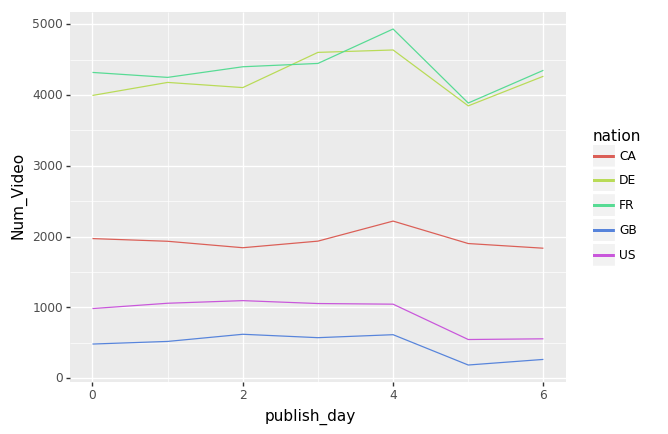

<ggplot: (-9223372036824306684)>

In [25]:
ddf = cat_df.groupby('nation').publish_day.value_counts().to_frame().rename(columns = {'publish_day':'Num_Video'}).reset_index()
p9.ggplot(ddf, p9.aes(x = 'publish_day', y = 'Num_Video', color = 'nation')) + p9.geom_line()

### Ratio Analysis
Nonprofits & Activism videos are more controversial and have more acitive posts

In [26]:
def ratio_plot(df, denominator, numerator):
    ratio = df.groupby('category').sum()[numerator] / df.groupby('category').sum()[denominator]*1000
    ratio = ratio.sort_values(ascending = False).reset_index()
    ratio.columns = ['category','ratio']
    fig, ax = plt.subplots(figsize = (15,8))
    fig = sns.barplot(x = 'ratio', y = 'category', data = ratio)
    ax.set(title = denominator + '_' + numerator + '_' + 'ratio')

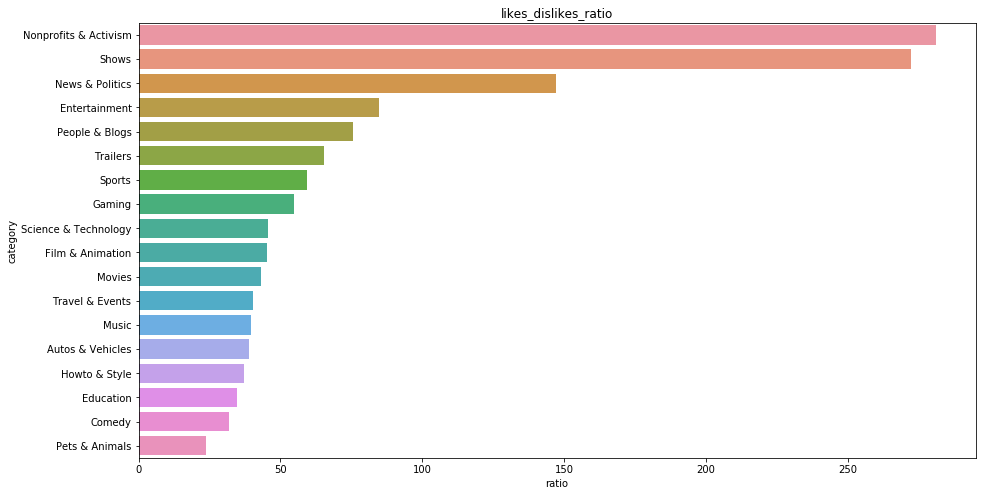

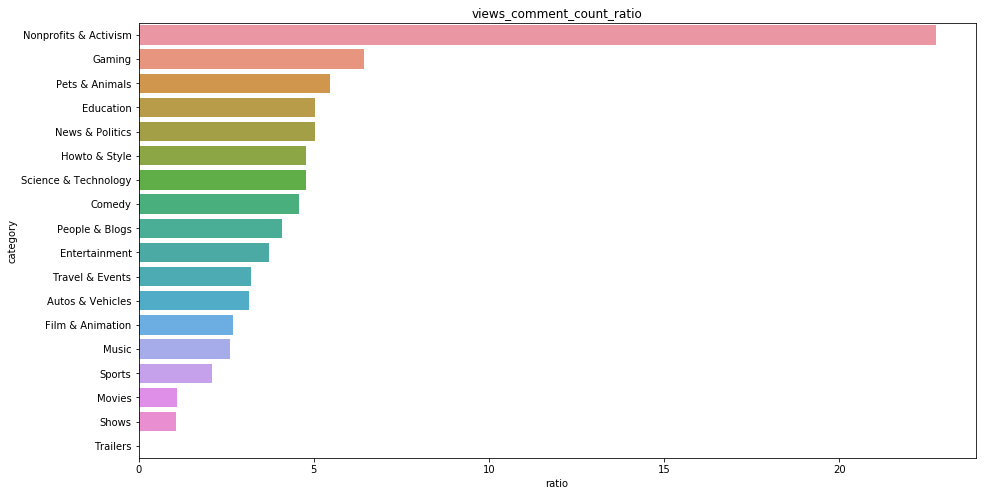

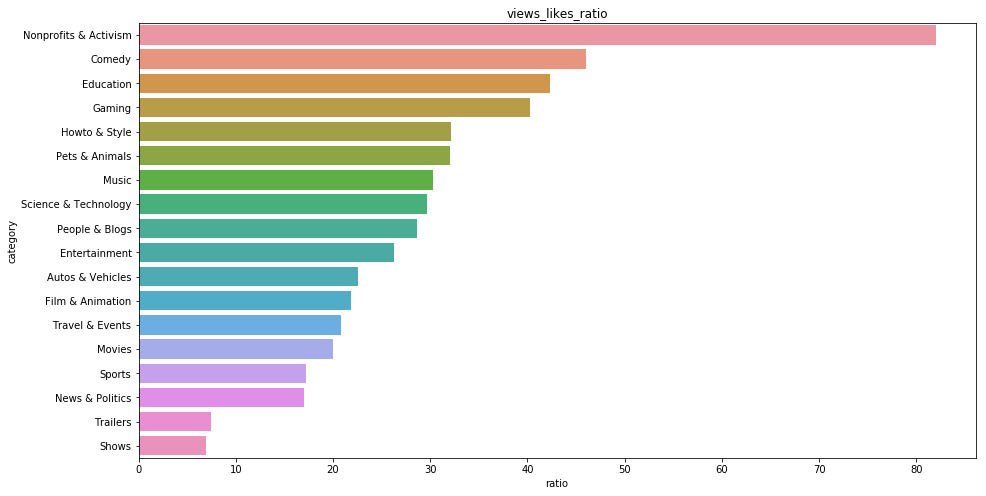

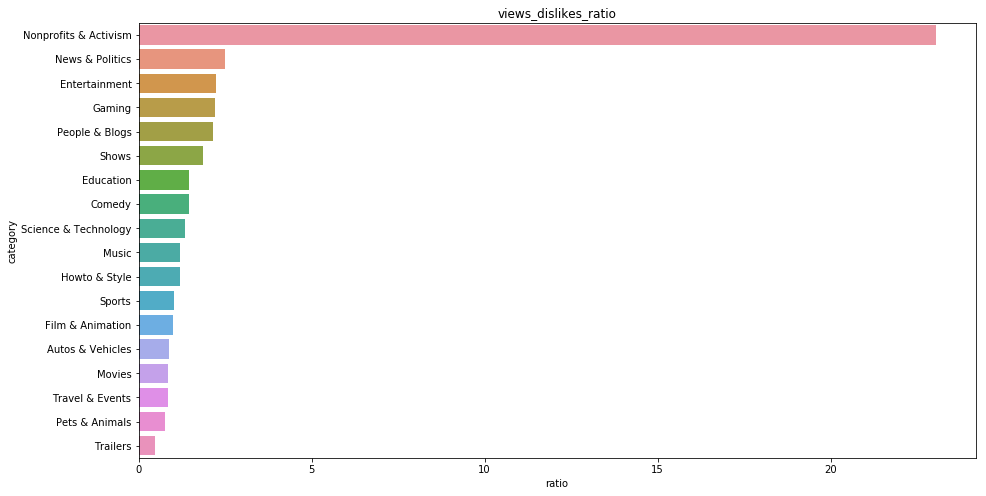

In [27]:
ratio_plot(cat_df, 'likes', 'dislikes')
ratio_plot(cat_df, 'views', 'comment_count')
ratio_plot(cat_df, 'views', 'likes')
ratio_plot(cat_df, 'views', 'dislikes')

## <a name = 'nltk'></a> Tags Sentimental Analysis

In [28]:
from wordcloud import WordCloud
import nltk
#nltk.download()
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk import sent_tokenize, word_tokenize
from wordcloud import WordCloud, STOPWORDS

from collections import Counter
from nltk.tokenize import RegexpTokenizer
import re

In [29]:
en_stopwords = list(stopwords.words('english'))
de_stopwords = list(stopwords.words('german'))   
fr_stopwords = list(stopwords.words('french'))   
en_stopwords.extend(de_stopwords)
en_stopwords.extend(fr_stopwords)

Text(0.5, 1.0, 'Polarity of Categories in Youtube videos')

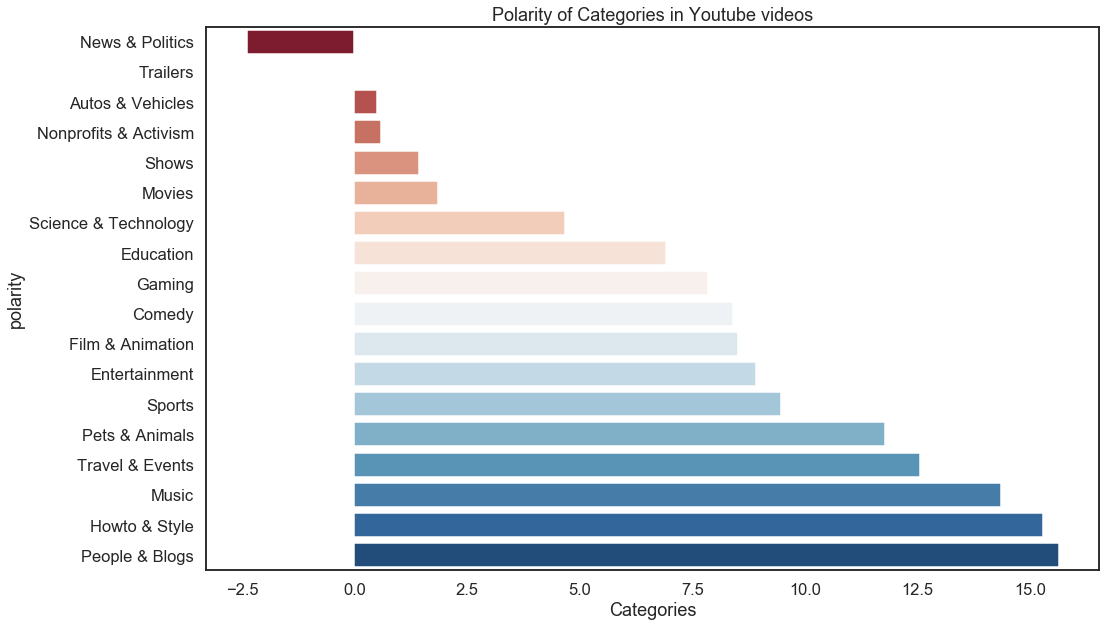

In [30]:
MAX_N = 1000

#remove all the stopwords from the text
en_stopwords = list(stopwords.words('english'))
de_stopwords = list(stopwords.words('german'))   
fr_stopwords = list(stopwords.words('french'))   
en_stopwords.extend(de_stopwords)
en_stopwords.extend(fr_stopwords)

polarities = list()
category_list = cat_df.category.unique()

for cate in category_list:
    tags_word = cat_df[cat_df['category']==cate]['tags'].str.lower().str.cat(sep=' ')

# removes punctuation,numbers and returns list of words
    tags_word = re.sub('[^A-Za-z]+', ' ', tags_word)
    word_tokens = word_tokenize(tags_word)
    filtered_sentence = [w for w in word_tokens if not w in en_stopwords]
    without_single_chr = [word for word in filtered_sentence if len(word) > 2]

# Remove numbers
    cleaned_data_title = [word for word in without_single_chr if not word.isdigit()]      
    
# Calculate frequency distribution
    word_dist = nltk.FreqDist(cleaned_data_title)
    hnhk = pd.DataFrame(word_dist.most_common(MAX_N),
                    columns=['Word', 'Frequency'])

    compound = .0
    for word in hnhk['Word'].head(MAX_N):
        compound += SentimentIntensityAnalyzer().polarity_scores(word)['compound']

    polarities.append(compound)

category_list = pd.DataFrame(category_list)
polarities = pd.DataFrame(polarities)
tags_sentiment = pd.concat([category_list,polarities],axis=1)
tags_sentiment.columns = ['category','polarity']
tags_sentiment=tags_sentiment.sort_values('polarity').reset_index()

plt.figure(figsize=(16,10))
sns.set(style="white",context="talk")
ax = sns.barplot(x=tags_sentiment['polarity'],y=tags_sentiment['category'], data=tags_sentiment,orient='h',palette="RdBu")
plt.xlabel("Categories")
plt.ylabel("polarity")
plt.title("Polarity of Categories in Youtube videos")


In [31]:
def wcloud(data,bgcolor):
    plt.figure(figsize = (20,15))
    cloud = WordCloud(background_color = bgcolor, max_words = 50,  max_font_size = 50)
    cloud.generate(' '.join(data))
    plt.imshow(cloud)
    plt.axis('off')

In [32]:
def clean_tag(cat):
    tags_word = cat_df[cat_df['category']==cat]['tags'].str.lower().str.cat(sep=' ')
    tags_word = re.sub('[^A-Za-z]+', ' ', tags_word)
    word_tokens = word_tokenize(tags_word)
    filtered_words = [w for w in word_tokens if not w in en_stopwords]
    without_single_chr = [word for word in filtered_words if len(word) > 2]
    cleaned_data = [word for word in without_single_chr if not word.isdigit()]
    return cleaned_data

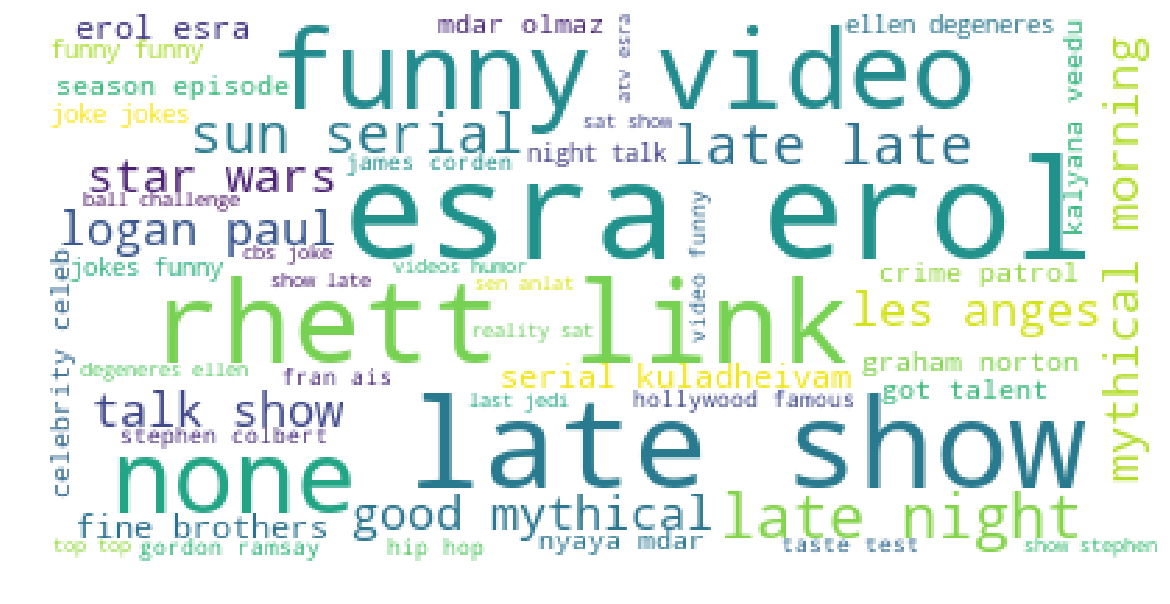

In [33]:
wcloud(clean_tag('Entertainment'), 'white')

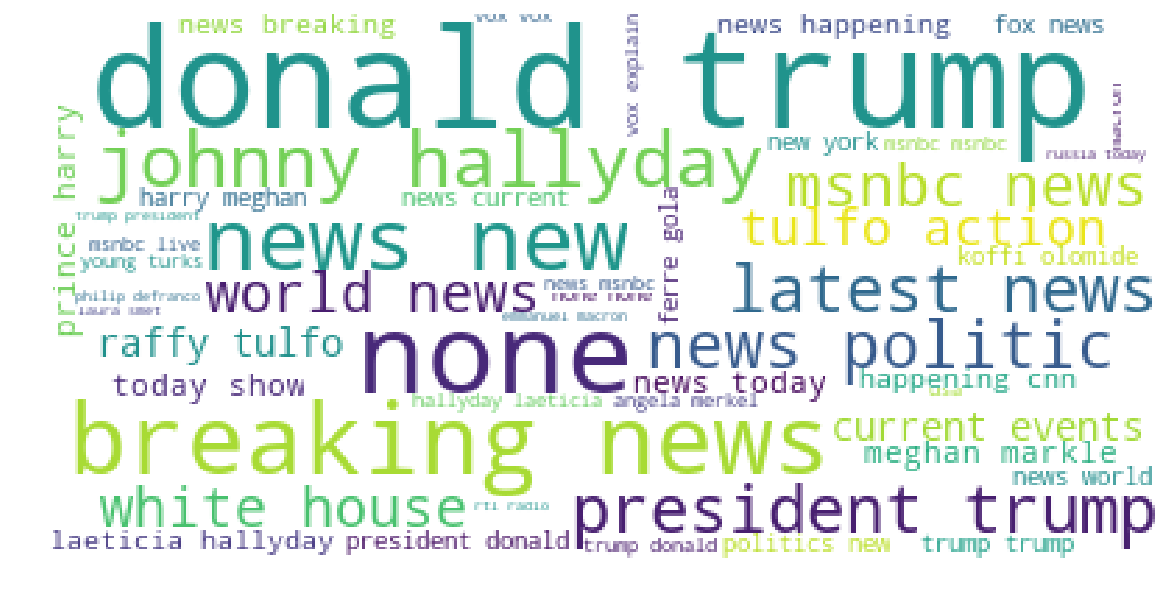

In [34]:
wcloud(clean_tag('News & Politics'), 'white')

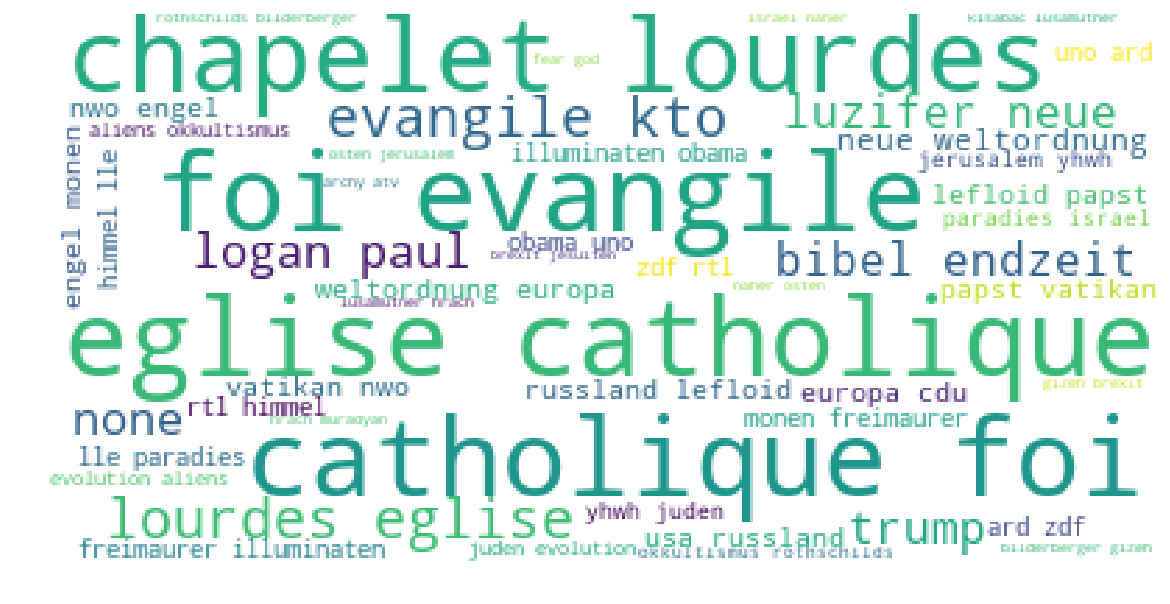

In [35]:
wcloud(clean_tag('Nonprofits & Activism'), 'white')